750.0 liters of water will reach the aquifer.
The remaining water in the tank is 1450.0 liters.
The total access water is 2200.0 liters.


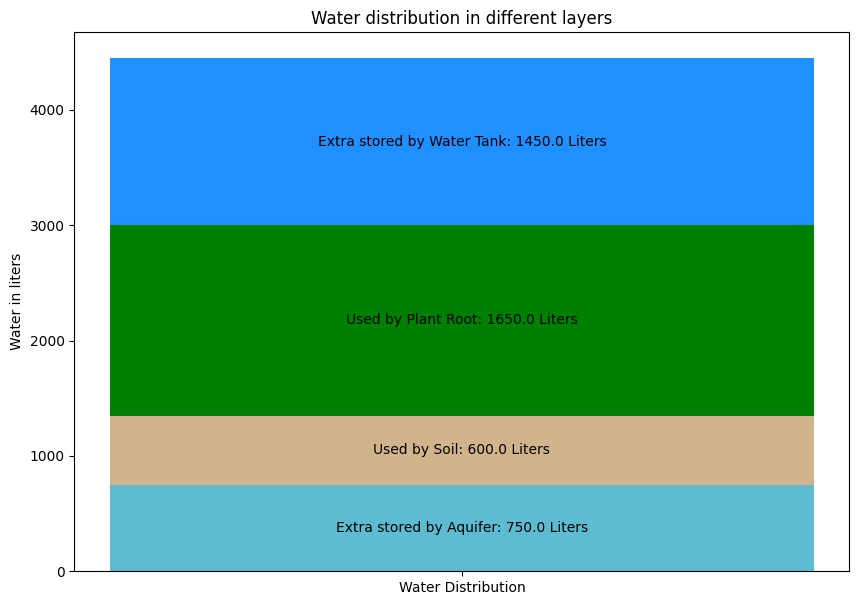

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of different plants and their monthly water usage
plants = {
    'Plant1': 0.3,  # 30% of water is used by Plant1
    'Plant2': 0.25,  # 25% of water is used by Plant2
    # ... add more plants as needed
}

# Parameters
water_tank_capacity = 3000  # in liters
soil_absorption = 0.4  # 40% of water is absorbed by the soil
land_area = 100  # in m^2
soil_depth = 15  # in m, the depth from the surface to the ocean layer
rainfall = 100  # average monthly rainfall during the dry season (in mm)
tank_open_area = 1  # open area of the tank that gathers rainwater (in m^2)

# Convert rainfall from mm to liters (1 mm of rainfall = 1 liter of water per square meter)
rainfall_liters = rainfall * tank_open_area

# Calculate total water usage by plants
total_plant_usage = 0
for plant, usage in plants.items():
    total_plant_usage += usage * water_tank_capacity

# Calculate total water absorption by soil
total_soil_absorption = soil_absorption * land_area * soil_depth

# Calculate amount of water that reaches the aquifer
aquifer = water_tank_capacity - total_plant_usage - total_soil_absorption

# Calculate remaining water in the tank
remaining_water = water_tank_capacity - total_plant_usage + rainfall_liters

print(f'{aquifer} liters of water will reach the aquifer.')
print(f'The remaining water in the tank is {remaining_water} liters.')
print(f'The total access water is {remaining_water+aquifer} liters.')

# Generate stacked bar chart
layers = ['Extra stored by Aquifer', 'Used by Soil', 'Used by Plant Root', 'Extra stored by Water Tank']  # Reversed order
values = np.array([aquifer, total_soil_absorption, total_plant_usage, remaining_water])  # Reversed order
colors = ['#5DBCD2', '#D2B48C', '#008000', '#1E90FF']  # Custom colors

# Create the general blog and the "subplots" i.e. the bars
fig, ax = plt.subplots(1,1, figsize=(10, 7))  # Increased size

# Create a bar plot
for i in range(4):
    plt.bar(0, values[i], bottom=np.sum(values[:i]), color=colors[i], align='center')
    plt.text(0, np.sum(values[:i])+values[i]/2, f'{layers[i]}: {values[i]:.1f} Liters', ha = 'center', va = 'center')

# Set the y axis label
ax.set_ylabel('Water in liters')

# Set the chart's title
ax.set_title('Water distribution in different layers')

# Set the position of the x ticks
ax.set_xticks([0])

# Set the labels for the x ticks
ax.set_xticklabels(["Water Distribution"])

# Show the plot
plt.show()
